# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

/nfs/home/ivanmang/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554789074/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Episode 100	Average Score: 0.007	Current Score: 0.000
Episode 200	Average Score: 0.007	Current Score: 0.000
Episode 300	Average Score: 0.012	Current Score: 0.000
Episode 400	Average Score: 0.015	Current Score: 0.100
Episode 500	Average Score: 0.018	Current Score: 0.100
Episode 600	Average Score: 0.027	Current Score: 0.100
Episode 700	Average Score: 0.022	Current Score: 0.100
Episode 800	Average Score: 0.062	Current Score: 0.000
Episode 900	Average Score: 0.068	Current Score: 0.100
Episode 1000	Average Score: 0.074	Current Score: 0.100
Episode 1100	Average Score: 0.064	Current Score: 0.090
Episode 1200	Average Score: 0.070	Current Score: 0.000
Episode 1300	Average Score: 0.079	Current Score: 0.100
Episode 1400	Average Score: 0.088	Current Score: 0.100
Episode 1500	Average Score: 0.096	Current Score: 0.000
Episode 1600	Average Score: 0.106	Current Score: 0.190
Episode 1700	Average Score: 0.107	Current Score: 0.090
Episode 1800	Average Score: 0.120	Current Score: 0.000
Episode 1900	Averag

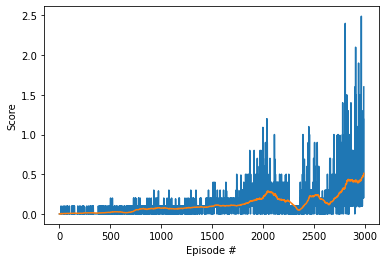

In [6]:
from ddpg_agent import Agent
from collections import deque
from maddpg import MADDPG
import random
import matplotlib.pyplot as plt
import torch
%matplotlib inline
all_scores = []
agent = MADDPG(num_agents, state_size, action_size, 1)

def ddpg(n_episodes=10000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    mov_avg = []
    
    solved = False
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name] 
            next_states = env_info.vector_observations
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += rewards                        # update the score (for each agent)
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states                               # roll over states to next time step
            
            if np.any(dones):
                break 
        # Get the max scores from all agents
        max_score = np.max(scores)
        scores_deque.append(max_score)
        all_scores.append(max_score)
        deque_mean = np.mean(scores_deque)
        mov_avg.append(deque_mean)
        
        print('\rEpisode {}\tAverage Score: {:.3f}\tCurrent Score: {:.3f}'.format(i_episode, deque_mean, max_score), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, deque_mean))

        # Print the episode when the environment is solved and continue training
        if len(scores_deque) == 100 and deque_mean > 0.5 and solved == False:
            solved = True
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, deque_mean))
            break
    
    # Save the param of the trained agent
    agent.save_weight()
    return all_scores, mov_avg

all_scores, mov_avg = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(all_scores)+1), all_scores)
plt.plot(np.arange(1, len(mov_avg)+1), mov_avg)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch the agents playing tennis

In [7]:
agent = MADDPG(num_agents, state_size, action_size, 1)
for i in range(num_agents):
    agent.agents[i].actor_local.load_state_dict(torch.load(f'checkpoint_actor_{i}.pth'))
    agent.agents[i].critic_local.load_state_dict(torch.load(f'checkpoint_critic_{i}.pth'))
for i in range(1, 6):  
    #load the weights from file
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    # Select the model weights trained, in this case we choose the double.pth

    states = env_info.vector_observations           # get the current state
    scores = np.zeros(num_agents)                                     # initialize the score
    while True:
        actions = agent.act(states) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.39000000804662704
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.30000000447034836
Score (max over agents) from episode 5: 0.30000000447034836


In [8]:
env.close()